In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# **Dataset-1**

In [5]:
#Loading dataset
data = pd.read_csv("/content/drive/MyDrive/EV/EV-Dashboard-Data-Evahan.csv")

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
data.head()

,Year,Month_name,Day,Date,State,Vehicle Class,Vehicle Category,Vehicle Type,CNG ONLY,DIESEL,DIESEL/HYBRID,DI-METHYL ETHER,DUAL DIESEL/BIO CNG,DUAL DIESEL/CNG,DUAL DIESEL/LNG,ELECTRIC(BOV),ETHANOL,FUEL CELL HYDROGEN,LNG,LPG ONLY,METHANOL,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,Total
0,2022,feb,1,01-02-2022,Andaman & Nicobar Island,GOODS CARRIER,Others,Others,0,15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,16
1,2022,feb,1,01-02-2022,Andaman & Nicobar Island,MAXI CAB,Others,Others,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2022,feb,1,01-02-2022,Andaman & Nicobar Island,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,326,0,0,0,0,0,0,326
3,2022,feb,1,01-02-2022,Andaman & Nicobar Island,MOPED,2-Wheelers,2W_Personal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,0,0,0,0,0,0,61
4,2022,feb,1,01-02-2022,Andaman & Nicobar Island,MOTOR CAB,4-Wheelers,4W_Shared,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [8]:
data.columns

Index(['Year', 'Month_name', 'Day', 'Date', 'State', 'Vehicle Class',
       'Vehicle Category', 'Vehicle Type', 'CNG ONLY', 'DIESEL',
       'DIESEL/HYBRID', 'DI-METHYL ETHER', 'DUAL DIESEL/BIO CNG',
       'DUAL DIESEL/CNG', 'DUAL DIESEL/LNG', 'ELECTRIC(BOV)', 'ETHANOL',
       'FUEL CELL HYDROGEN', 'LNG', 'LPG ONLY', 'METHANOL', 'NOT APPLICABLE',
       'PETROL', 'PETROL/CNG', 'PETROL/ETHANOL', 'PETROL/HYBRID', 'PETROL/LPG',
       'PETROL/METHANOL', 'SOLAR', 'Total'],
      dtype='object')

# **EDA**

<ipython-input-9-e7566b55c9fd>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ELECTRIC(BOV)', y='State', data=ev_distribution, ci=None)


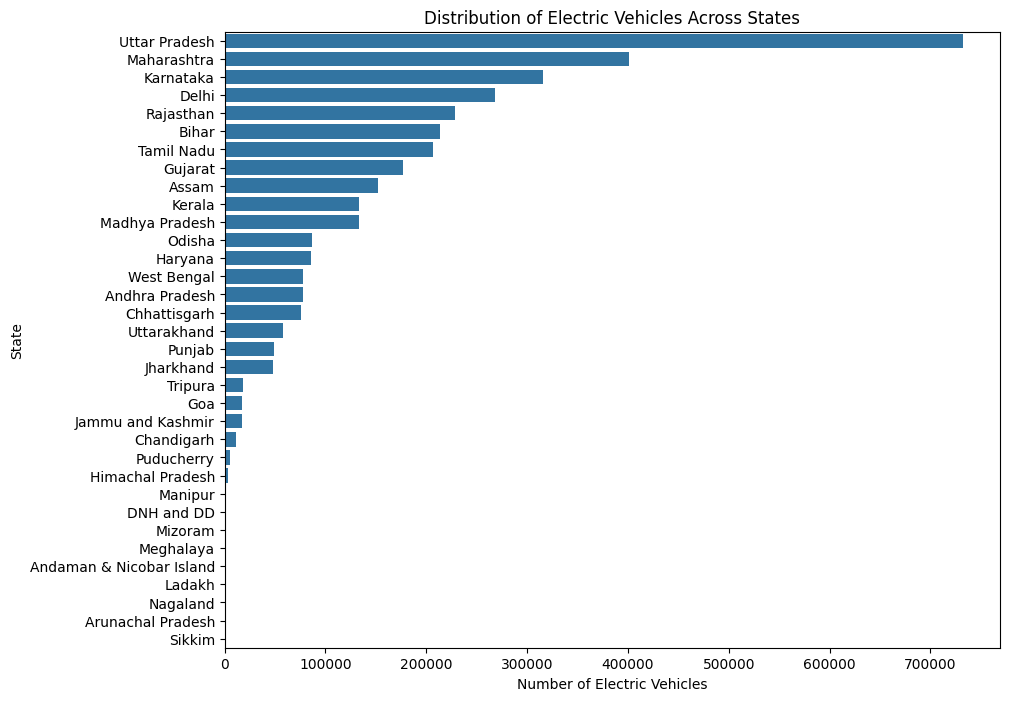

In [9]:
# Grouping by 'State' and summing up the number of electric vehicles
ev_distribution = data.groupby('State')['ELECTRIC(BOV)'].sum().reset_index()

# Sorting the data based on the number of electric vehicles
ev_distribution = ev_distribution.sort_values(by='ELECTRIC(BOV)', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='ELECTRIC(BOV)', y='State', data=ev_distribution, ci=None)
plt.title('Distribution of Electric Vehicles Across States')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('State')
plt.show()


In [10]:
# EV penetration by statewise

ev_data = data.groupby('State')[['ELECTRIC(BOV)','Total']].sum().reset_index()
ev_data['EV Penetration'] = (ev_data['ELECTRIC(BOV)'] / data['Total'].sum()) * 100

In [11]:
ev_data.sort_values(by='EV Penetration', ascending=False)

,State,ELECTRIC(BOV),Total,EV Penetration
31,Uttar Pradesh,732074,29383067,0.335644
19,Maharashtra,401535,23419395,0.184097
15,Karnataka,315498,15487780,0.144651
8,Delhi,268538,6180530,0.123120
27,Rajasthan,228573,13342013,0.104797
4,Bihar,213465,10292645,0.097870
29,Tamil Nadu,206902,17950858,0.094861
10,Gujarat,176713,15676576,0.081020
3,Assam,151917,4445923,0.069651
16,Kerala,133246,8713655,0.061091


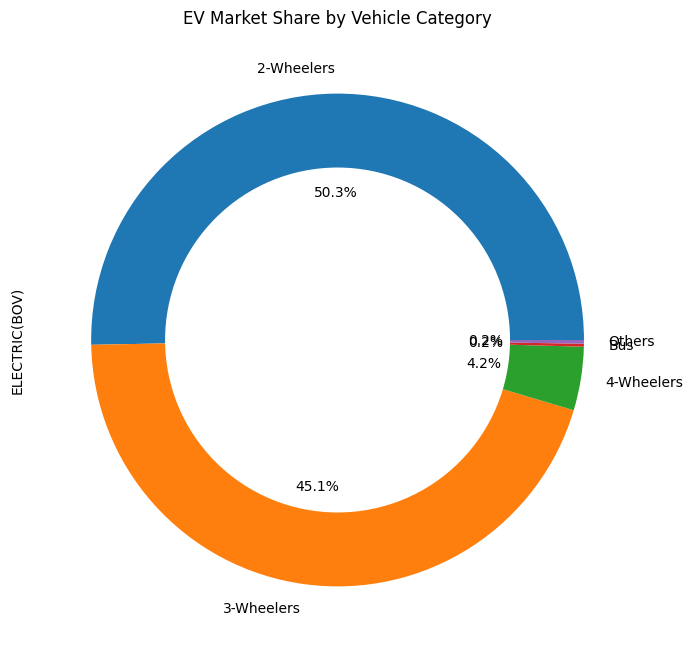

In [12]:
# EV sales by vehicle category donut chart

# Create a pie chart
plt.figure(figsize=(8, 8))
data.groupby("Vehicle Category")["ELECTRIC(BOV)"].sum().plot(kind='pie', autopct='%1.1f%%')

# Draw a white circle at the center to make it a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('EV Market Share by Vehicle Category')
plt.show()



In [13]:
fuel_types= ["DIESEL","DIESEL/HYBRID","DI-METHYL ETHER","DUAL DIESEL/BIO CNG","DUAL DIESEL/CNG","DUAL DIESEL/LNG","ELECTRIC(BOV)","ETHANOL","FUEL CELL HYDROGEN",
             "LNG","LPG ONLY","METHANOL","PETROL","PETROL/CNG","PETROL/ETHANOL","PETROL/HYBRID","PETROL/LPG","PETROL/METHANOL","SOLAR"]

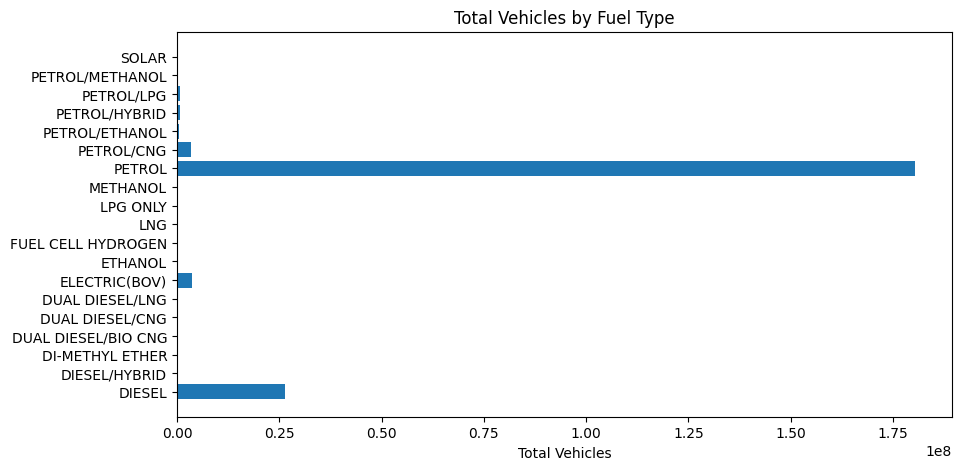

In [14]:
#Plotting horizontal bar graph to show sum of differetnt fuel types

plt.figure(figsize=(10,5))
plt.barh(fuel_types,data[fuel_types].sum())
plt.xlabel('Total Vehicles')
plt.title('Total Vehicles by Fuel Type')
plt.show()

In [15]:
seg_features = ["Vehicle Category","PETROL","DIESEL","ELECTRIC(BOV)","PETROL/CNG","Total","Vehicle Type"]

In [16]:
df_relevant = pd.get_dummies(data[seg_features], columns=["Vehicle Type"])

In [17]:
df_grouped = df_relevant.groupby("Vehicle Category").sum().reset_index()

In [18]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_grouped.drop("Vehicle Category",axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

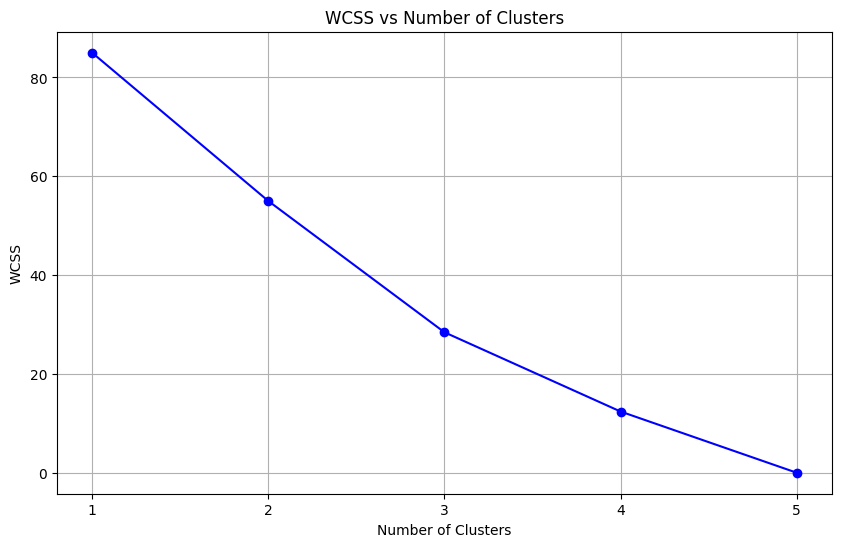

In [19]:
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), wcss, marker='o', linestyle='-', color='b')
plt.title('WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='ELECTRIC(BOV)', ylabel='Total'>

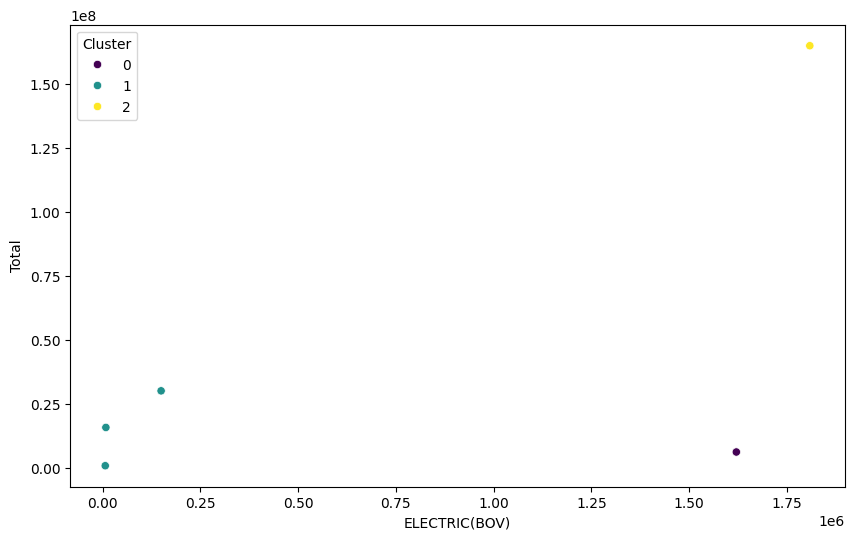

In [20]:
#Optimal clusters = 3

kmeans = KMeans(n_clusters=3, random_state=42)
df_grouped['Cluster'] = kmeans.fit_predict(scaled_data)

#Viewing Clusters graphically in scatterplot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ELECTRIC(BOV)', y='Total', hue='Cluster', data=df_grouped, palette='viridis')

In [21]:
df_grouped.head()

,Vehicle Category,PETROL,DIESEL,ELECTRIC(BOV),PETROL/CNG,Total,Vehicle Type_2W_Personal,Vehicle Type_2W_Shared,Vehicle Type_3W_Goods,Vehicle Type_3W_Goods_LowSpeed,Vehicle Type_3W_Personal,Vehicle Type_3W_Shared,Vehicle Type_3W_Shared_LowSpeed,Vehicle Type_4W_Personal,Vehicle Type_4W_Shared,Vehicle Type_Bus,Vehicle Type_Institution Bus,Vehicle Type_Others,Cluster
0,2-Wheelers,162764654,12907,1808105,3736,165107177,11700,1421,0,0,0,0,0,0,0,0,0,0,2
1,3-Wheelers,187876,2272672,1620310,906466,6209248,0,0,3208,1517,1029,3786,1951,0,0,0,0,0,0
2,4-Wheelers,17008377,9204953,149775,2518311,30131452,0,0,0,0,0,0,0,4111,4580,0,0,0,1
3,Bus,57307,720081,7009,2537,845567,0,0,0,0,0,0,0,0,0,7026,2093,0,1
4,Others,385646,14209602,8612,44466,15816874,0,0,0,0,0,0,0,0,0,0,0,54423,1


# **Dataset-2**

In [22]:
#Combining datasets

'''
data_vehicle_count = pd.read_csv("/content/drive/MyDrive/EV/Statewise EV-Non EV counts-2023.csv")
data_charging_station_count = pd.read_csv("/content/drive/MyDrive/EV/Statewise EV- Charging Stations count-2023.csv")

#Converting strings to lower case
data_vehicle_count['State/UT'] = data_vehicle_count['State/UT'].str.lower()
data_charging_station_count['State/UT'] = data_charging_station_count['State/UT'].str.lower()
data_vehicle_count.drop(data_vehicle_count.columns[0],axis=1,inplace=True)
data_charging_station_count.drop(data_charging_station_count.columns[0],axis=1,inplace=True)

map= {'andaman and nicobar islands' :'andaman and nicobar',
      'grand total':'total vehicle count',
      'total':'total number of charging stations'}

data_vehicle_count.loc[data_vehicle_count['State/UT'].isin(['andaman and nicobar islands', 'grand total']), 'State/UT'] = data_vehicle_count['State/UT'].map(map)
data_charging_station_count.loc[data_charging_station_count['State/UT'].isin(['total']), 'State/UT'] = data_charging_station_count['State/UT'].map(map)


#Merging datasets on State/UT
data= pd.merge(data_vehicle_count,data_charging_station_count,on='State/UT')

#Saving combined file as csv
EV_data= data.to_csv('EV_data.csv')
'''

'\ndata_vehicle_count = pd.read_csv("/content/drive/MyDrive/EV/Statewise EV-Non EV counts-2023.csv")\ndata_charging_station_count = pd.read_csv("/content/drive/MyDrive/EV/Statewise EV- Charging Stations count-2023.csv")\n\n#Converting strings to lower case\ndata_vehicle_count[\'State/UT\'] = data_vehicle_count[\'State/UT\'].str.lower()\ndata_charging_station_count[\'State/UT\'] = data_charging_station_count[\'State/UT\'].str.lower()\ndata_vehicle_count.drop(data_vehicle_count.columns[0],axis=1,inplace=True)\ndata_charging_station_count.drop(data_charging_station_count.columns[0],axis=1,inplace=True)\n\nmap= {\'andaman and nicobar islands\' :\'andaman and nicobar\',\n      \'grand total\':\'total vehicle count\',\n      \'total\':\'total number of charging stations\'}\n\ndata_vehicle_count.loc[data_vehicle_count[\'State/UT\'].isin([\'andaman and nicobar islands\', \'grand total\']), \'State/UT\'] = data_vehicle_count[\'State/UT\'].map(map)\ndata_charging_station_count.loc[data_charging_

In [23]:
#Loading dataset
ev_df = pd.read_csv("/content/drive/MyDrive/EV/EV_data.csv")

In [24]:
ev_df.head()

,Unnamed: 0,State/UT,Electric,Non-electric,No. of Operational PCS
0,0,andaman and nicobar,190,161258,3
1,1,andhra pradesh,67905,16553509,222
2,2,arunachal pradesh,28,303673,9
3,3,assam,120423,5312457,48
4,4,bihar,161060,11631081,83


In [25]:
#Dropping index column
ev_df.drop("Unnamed: 0",axis=1,inplace=True)

In [26]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State/UT                32 non-null     object
 1   Electric                32 non-null     int64 
 2   Non-electric            32 non-null     int64 
 3   No. of Operational PCS  32 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [27]:
#Feature engineering, adding key metrics
ev_df['Total'] = ev_df['Electric'] + ev_df['Non-electric']
ev_df['Electric_Percentage'] = (ev_df['Electric'] / ev_df['Total']) * 100
ev_df['PCS_per_1000_vehicles'] = (ev_df['No. of Operational PCS'] / ev_df['Electric']) * 1000

In [28]:
ev_df.head()

,State/UT,Electric,Non-electric,No. of Operational PCS,Total,Electric_Percentage,PCS_per_1000_vehicles
0,andaman and nicobar,190,161258,3,161448,0.117685,15.789474
1,andhra pradesh,67905,16553509,222,16621414,0.408539,3.269273
2,arunachal pradesh,28,303673,9,303701,0.009220,321.428571
3,assam,120423,5312457,48,5432880,2.216559,0.398595
4,bihar,161060,11631081,83,11792141,1.365825,0.515336


In [29]:
#Feature Scaling

features = ["Electric","Non-electric","No. of Operational PCS","Electric_Percentage","PCS_per_1000_vehicles"]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(ev_df[features])
scaled_df = pd.DataFrame(scaled_features, columns=features)
scaled_df.head()


,Electric,Non-electric,No. of Operational PCS,Electric_Percentage,PCS_per_1000_vehicles
0,-0.738269,-0.923176,-0.552079,-0.992340,-0.098834
1,-0.171849,0.501197,0.079693,-0.479344,-0.303848
2,-0.739624,-0.910801,-0.534770,-1.183646,4.905889
3,0.267451,-0.475572,-0.422263,2.709564,-0.350854
4,0.607370,0.073472,-0.321295,1.209075,-0.348942


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

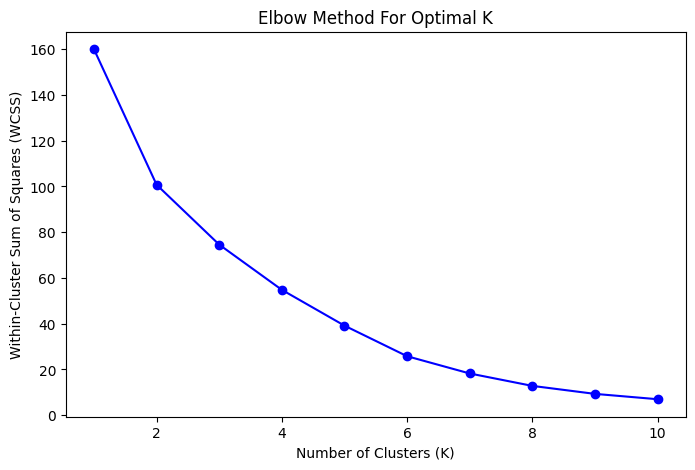

In [30]:
#Elbow Curve Plot
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal K')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

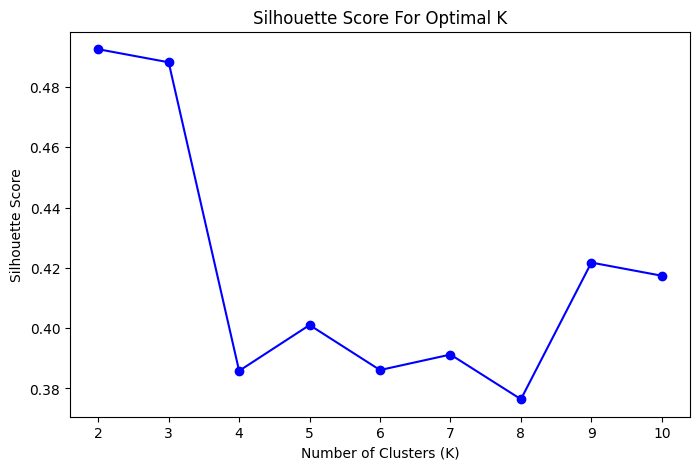

In [31]:
#Silhouette Score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal K')
plt.show()

In [32]:
# Define the number of clusters
optimal_k = 2

# Initialize KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the model and predict clusters
ev_df['Cluster'] = kmeans.fit_predict(scaled_df)

# Display cluster centers
print("Cluster Centers (Scaled):")
print(pd.DataFrame(kmeans.cluster_centers_, columns=features))

Cluster Centers (Scaled):
   Electric  Non-electric  No. of Operational PCS  Electric_Percentage  \
0 -0.338567     -0.320690               -0.329522            -0.116627   
1  1.828263      1.731724                1.779417             0.629784   

   PCS_per_1000_vehicles  
0               0.056382  
1              -0.304463  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [33]:
# Inverse transform the cluster centers to original scale
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(original_centers, columns=features)
print("Cluster Centers (Original Scale):")
print(centers_df)

Cluster Centers (Original Scale):
   Electric  Non-electric  No. of Operational PCS  Electric_Percentage  \
0   47974.0  7.094908e+06               80.148148             0.614189   
1  307016.8  3.071490e+07              811.200000             1.037383   

   PCS_per_1000_vehicles  
0              25.268554  
1               3.231671  


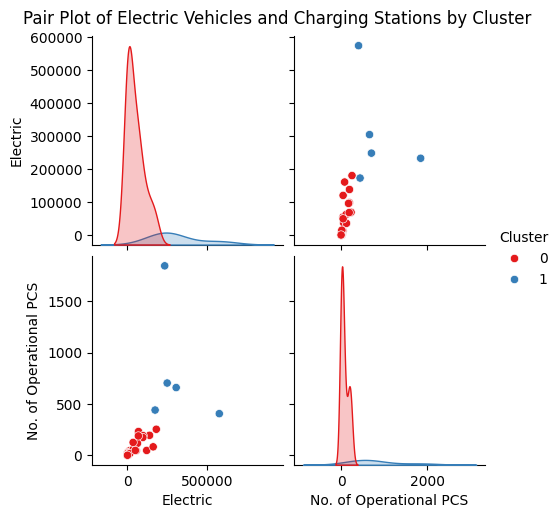

In [34]:
#Pair plot between Electric Vehicles and charging stations

sns.pairplot(ev_df, vars=['Electric','No. of Operational PCS'], hue='Cluster', palette='Set1')
plt.suptitle('Pair Plot of Electric Vehicles and Charging Stations by Cluster', y=1.02)
plt.show()

In [35]:
#Cluster Summary
cluster_summary = ev_df.groupby('Cluster')[features].mean().reset_index()
print(cluster_summary)

   Cluster  Electric  Non-electric  No. of Operational PCS  \
0        0   47974.0  7.094908e+06               80.148148   
1        1  307016.8  3.071490e+07              811.200000   

   Electric_Percentage  PCS_per_1000_vehicles  
0             0.614189              25.268554  
1             1.037383               3.231671  


In [36]:
ev_df.groupby('Cluster').size()

,0
Cluster,
0,27
1,5


In [37]:
ev_df[ev_df['Cluster']==1].head()

,State/UT,Electric,Non-electric,No. of Operational PCS,Total,Electric_Percentage,PCS_per_1000_vehicles,Cluster
7,delhi,233212,13994966,1845,14228178,1.639085,7.911257,1
14,karnataka,248747,29785247,704,30033994,0.828218,2.830185,1
17,maharashtra,305006,34323748,660,34628754,0.880788,2.163892,1
26,tamil nadu,173152,31618002,441,31791154,0.544655,2.546895,1
29,uttar pradesh,574967,43852548,406,44427515,1.294169,0.706127,1
